1

In [1]:
import pandas as pd
data = pd.read_csv('/content/medical cost personal dataset.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [2]:
print("First 5 rows of the dataset:")
print(data.head())
print("\nColumn names and data types:")
print(data.dtypes)
print("\nSummary statistics:")
print(data.describe())
print("\nDataset Information:")
print(data.info())

First 5 rows of the dataset:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Column names and data types:
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Summary statistics:
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400

2

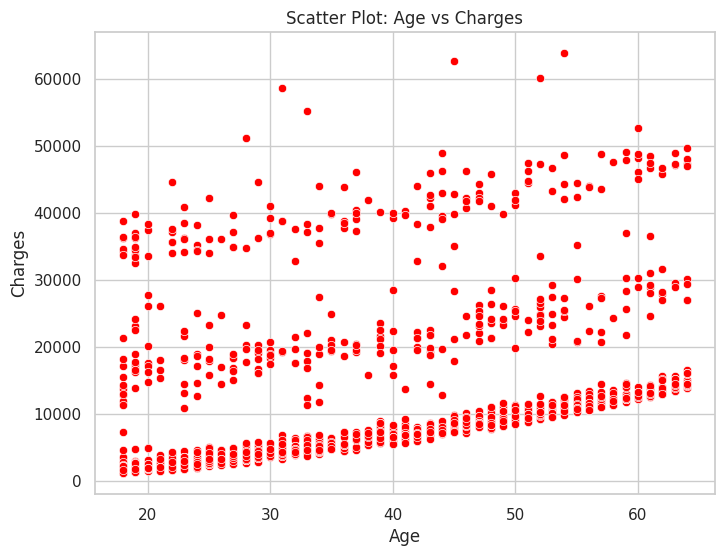

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='charges', data=data, color='Red')
plt.title('Scatter Plot: Age vs Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()


3

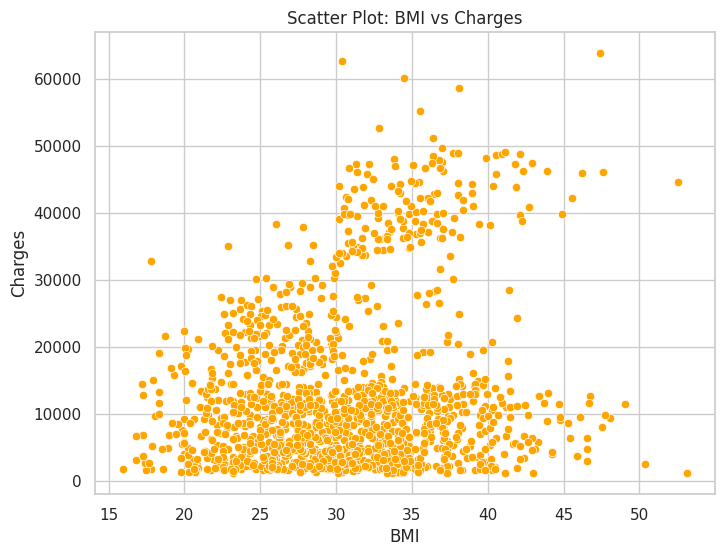

In [8]:
plt.figure(figsize=(8, 6))
# Changed 'BMI' to 'bmi' to match the column name in the DataFrame
sns.scatterplot(x='bmi', y='charges', data=data, color='Orange')
plt.title('Scatter Plot: BMI vs Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()


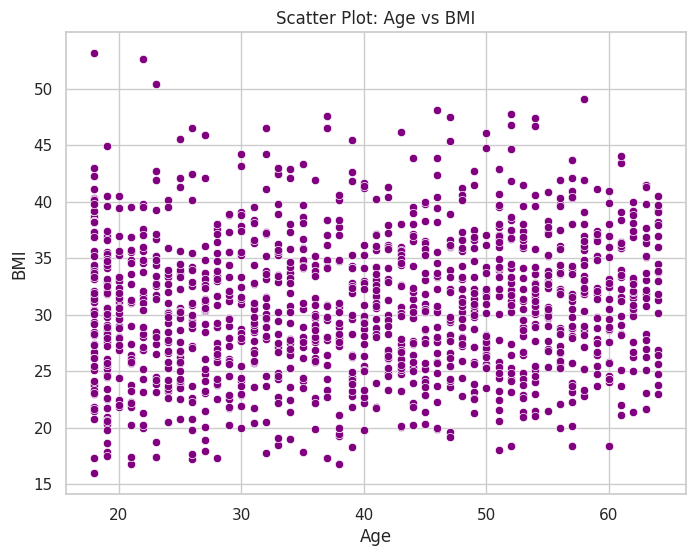

In [5]:
plt.figure(figsize=(8, 6))
# Changed 'BMI' to 'bmi' to match the column name in the DataFrame
sns.scatterplot(x='age', y='bmi', data=data, color='purple')
plt.title('Scatter Plot: Age vs BMI')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

Correlation Matrix:
               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


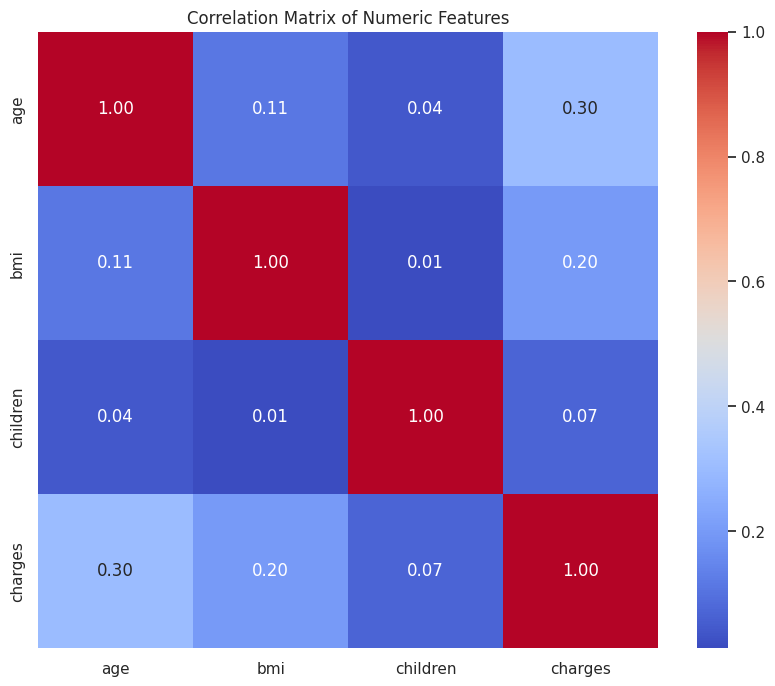


Significant Predictors of Charges:
charges     1.000000
age         0.299008
bmi         0.198341
children    0.067998
Name: charges, dtype: float64


In [9]:

numeric_data = data.select_dtypes(include=['number'])

correlation_matrix = numeric_data.corr()
print("Correlation Matrix:")
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()

significant_predictors = correlation_matrix['charges'].sort_values(ascending=False)
print("\nSignificant Predictors of Charges:")
print(significant_predictors)


4

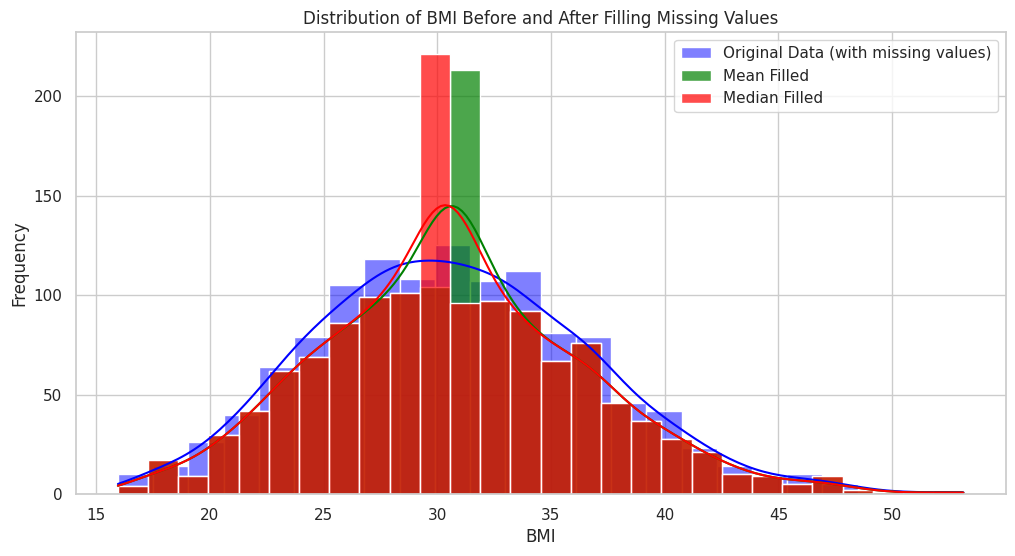

In [10]:
import numpy as np
data['bmi'] = data['bmi'].mask(np.random.random(len(data)) < 0.1)


mean_bmi = data['bmi'].mean()

data['bmi_mean_filled'] = data['bmi'].fillna(mean_bmi)


median_bmi = data['bmi'].median()

data['bmi_median_filled'] = data['bmi'].fillna(median_bmi)

plt.figure(figsize=(12, 6))
sns.histplot(data['bmi'], color='blue', label='Original Data (with missing values)', kde=True)  # Original data with NaN
sns.histplot(data['bmi_mean_filled'], color='green', label='Mean Filled', kde=True, alpha=0.7)  # Mean filled data
sns.histplot(data['bmi_median_filled'], color='red', label='Median Filled', kde=True, alpha=0.7)  # Median filled data
plt.title('Distribution of BMI Before and After Filling Missing Values')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.legend()
plt.show()

5

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

data['bmi'] = data['bmi'].fillna(data['bmi'].mean())

X = data[['age', 'bmi']]
y = data['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print("Model Evaluation Metrics:")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Model Evaluation Metrics:
Root Mean Squared Error (RMSE): 11423.29
Mean Absolute Error (MAE): 9158.58
